# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 6, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) (the one you have downloaded from Absalon) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. 

## Problems from Exercise Set 2:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 2.3.4:** The code below runs through some of the steps we completed in exercise 2.3.4 in Module 2. As we are not going to request the website but load the data from a csv file, your task is to **rewrite parts of the function**. In particular, you need to do the following:
>1. Rename the function to `process_weather` instead of `load_weather`. 
>2. The function should now  take a `dataframe` as input. 
>3. Consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The documentation string should also be rewritten appropriately. 
>4. The function contains a sorting step. **Change it so that it first sorts by _station_, then by _datetime_. The sorting should be ascending for _station_ and descending for _datetime_.** 
>5. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `process_weather` function to this dataframe, and store the result in the variable `df_weather_period`.

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

def process_weather(df):
    
    '''
    Input: Dataframe with 4 columns: station id, datetime, obs_type, obs_value
    
    Output: Processed dataframe with 4 additional columns: area, datetime_dt, month, year

    Process includes:
    - Renameing columns
    - Selecting only oberservations with maximum temerature
    - Compiling additional columns
    - Sorting: 1. station 2. datetime
    - Resetting index
    '''
    
    # Process dataframe using methods chaining
    df_out = \
        df\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(\
                obs_value=lambda df: df['obs_value']/10,\
                area = lambda df: df['station'].str.extract('([a-zA-Z]+)'),\
                datetime_dt = lambda df: pd.to_datetime(df['datetime'], format = '%Y%m%d'),\
                month = lambda df: df['datetime_dt'].dt.month.map('{:02}'.format),\
                year = lambda df: df['datetime_dt'].dt.year)\
            .sort_values(by=['station', 'datetime'],ascending = (True,False))\
            .reset_index(drop=True)\
            .copy() 

    
    return df_out

data = pd.read_csv('weather_data_1870-1875.csv')
df_weather_period = process_weather(data)
print(df_weather_period.dtypes)
df_weather_period



station                object
datetime                int64
obs_type               object
obs_value             float64
area                   object
datetime_dt    datetime64[ns]
month                  object
year                    int64
dtype: object


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,01,1870
132313,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,01,1870
132314,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,01,1870
132315,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,01,1870


> **Ex. 2.NEW (Not seen in module 2):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these three observations be characterized as? Drop ALL observations from the associated station from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

In [2]:
# Drop the observations below -50 - these contain measurement errors (or mislabeled)
df_weather_period = df_weather_period[df_weather_period['obs_value'] >= -50]

# Reset index
df_weather_period = df_weather_period.reset_index(drop = True)

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
132309,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,01,1870
132310,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,01,1870
132311,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,01,1870
132312,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,01,1870


> **Ex. 2.3.2:** 
Continuing with the `df_weather_period` from last exercise, do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [3]:
# Making area a categorical variable
df_weather_period['area'] = df_weather_period['area'].astype('category')

# Creating observational categories
df_weather_period['obs_value_cat'] = pd.qcut(df_weather_period['obs_value'],q=[0,0.1,0.9,1])

# Creating observational categories labels
df_weather_period['obs_value_cat_labeled'] = pd.qcut(df_weather_period['obs_value'],q=[0,0.1,0.9,1], labels = ['cold','medium','hot'])

# Printing types
print(df_weather_period.dtypes)

# Printing dataframe
df_weather_period

station                          object
datetime                          int64
obs_type                         object
obs_value                       float64
area                           category
datetime_dt              datetime64[ns]
month                            object
year                              int64
obs_value_cat                  category
obs_value_cat_labeled          category
dtype: object


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled
0,ASN00048013,18751117,TMAX,38.3,ASN,1875-11-17,11,1875,"(28.3, 47.8]",hot
1,ASN00048013,18751116,TMAX,33.8,ASN,1875-11-16,11,1875,"(28.3, 47.8]",hot
2,ASN00048013,18751115,TMAX,32.8,ASN,1875-11-15,11,1875,"(28.3, 47.8]",hot
3,ASN00048013,18751114,TMAX,35.6,ASN,1875-11-14,11,1875,"(28.3, 47.8]",hot
4,ASN00048013,18751113,TMAX,29.7,ASN,1875-11-13,11,1875,"(28.3, 47.8]",hot
...,...,...,...,...,...,...,...,...,...,...
132309,USW00094728,18700105,TMAX,1.1,USW,1870-01-05,01,1870,"(-1.1, 28.3]",medium
132310,USW00094728,18700104,TMAX,1.7,USW,1870-01-04,01,1870,"(-1.1, 28.3]",medium
132311,USW00094728,18700103,TMAX,5.0,USW,1870-01-03,01,1870,"(-1.1, 28.3]",medium
132312,USW00094728,18700102,TMAX,12.2,USW,1870-01-02,01,1870,"(-1.1, 28.3]",medium


## Problems from Exercise Set 3:

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 3.3.2:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'CA006110549'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures. Try to make your plot look like the one below. 
<img src="station_data_plot.png">

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 3.3.3:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problems from Exercise Set 4:

> **Ex. 4.3.5:** This exercise consists of a set of small subelements: 
>
> 0. Show the first five rows of the titanic dataset. What information is in the dataset?
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Combine the two of the figures you created above into a two-panel figure and save it on your computer.

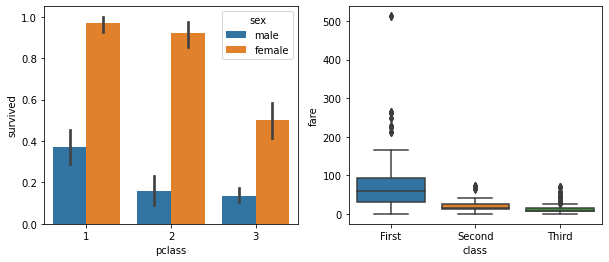

In [3]:
titanic = sns.load_dataset('titanic') #Loading the titanic dataset through the seaborn library

titanic.head(5) # Showing the first five rows of the titanic dataset. 

f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, ax=ax[0]) # Barplot to the left
sns.boxplot(x='class', y='fare', data=titanic, ax=ax[1]) # Barplpot to the right

plt.savefig('survival_fare_plot.pdf') # Saves the figure on the computer

### Question 0
The titanic dataset shows 15 variables, where some of the variables coincide. The first variable survived is a binary variable, where **0** indicates that the passenger died and **1** indicates that the passenger survived. The same information can be found from the string variable **alive**. The variables **pclass** and **class** shows what class level the passenegr where traveling on. Again there are two variables, **sex**, and **who**, that shows the sex of the passenger. The variable **sibsp** shows number of siblings/spouses aboard and **parch** are the number of parents/children aboard. As well the dataset shows the age of the passengers (**age**), the fare cost (**fare**) and if the passenger travelled alone (**alone**). The variables **embarked** and **embark_town** tells from wihcich harbour the passenger has embarked the titanic. 

### Question 3
It is not possible to make a boxplot showing the same information as the barplot from Question 2. This is due to the fact that a boxplot shows the shape of the distribution. Since the variable **survived** is binary, i.e. it only takes the values **0** indicating that the passenger died and **1** indicating that the passenger survived, it does not show a distributional shape.

> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
>
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

> **Ex. 6.1.3.:** How many results do you find in total? Store this number as 'TotalResultCount' for later use.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problems from Exercise Set 7

> **Ex. 7.2.1:** Here we practice locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. Next, use the **>Inspector<** tool (*right click on the table < press inspect element*) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()